<a href="https://colab.research.google.com/github/RyanAshB/Spam-or-Ham/blob/main/620140940_Ryan_Badaloo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
train_data = pd.read_csv("train.csv")

In [ ]:
print(train_data)

      label                                               text  EmailID
0       Ham  eric called me last night and i am happy to co...        0
1      Spam   tr what is funnygadget com funnygadget com ca...        1
2       Ham  ricky sent me the nom early - 87 , 000 for the...        2
3       Ham  these are the numbers that are being exported ...        3
4      Spam  authentic replica rolex and other watches for ...        4
...     ...                                                ...      ...
46519   Ham  thanks mo original message white stacey w sent...    46519
46520  Spam  hello , welcome to the medzo flagstaff nline\n...    46520
46521  Spam  here are different kinds of drugs for hair l o...    46521
46522  Spam  dear customer do you shop for medications on t...    46522
46523  Spam  yap international , inc . ( ypil )\nvoip techn...    46523

[46524 rows x 3 columns]


In [ ]:
train_data['label'].value_counts()

label
Ham     24532
Spam    21992
Name: count, dtype: int64

<BarContainer object of 2 artists>

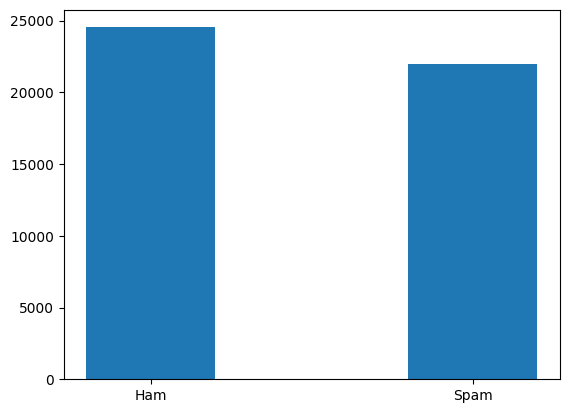

In [ ]:
vals_dict  = train_data['label'].value_counts().to_dict()
plt.bar(list(vals_dict.keys()), list(vals_dict.values()),
        width = 0.4)

In [ ]:
train_data.loc[train_data['label'] == 'Spam', 'label'] = 0
train_data.loc[train_data['label'] == 'Ham', 'label'] = 1

In [ ]:
train_data['label'] = train_data['label'].astype(int)

In [ ]:
print(train_data)

       label                                               text  EmailID
0          1  eric called me last night and i am happy to co...        0
1          0   tr what is funnygadget com funnygadget com ca...        1
2          1  ricky sent me the nom early - 87 , 000 for the...        2
3          1  these are the numbers that are being exported ...        3
4          0  authentic replica rolex and other watches for ...        4
...      ...                                                ...      ...
46519      1  thanks mo original message white stacey w sent...    46519
46520      0  hello , welcome to the medzo flagstaff nline\n...    46520
46521      0  here are different kinds of drugs for hair l o...    46521
46522      0  dear customer do you shop for medications on t...    46522
46523      0  yap international , inc . ( ypil )\nvoip techn...    46523

[46524 rows x 3 columns]


In [ ]:
train_data.describe()

,label,EmailID
count,46524.000000,46524.000000
mean,0.527298,23261.500000
std,0.499260,13430.466299
min,0.000000,0.000000
25%,0.000000,11630.750000
50%,1.000000,23261.500000
75%,1.000000,34892.250000
max,1.000000,46523.000000


In [ ]:
train_data.isna().sum()

label      0
text       0
EmailID    0
dtype: int64

In [ ]:
train_data = train_data.dropna()

In [ ]:
X = train_data['text']
y = train_data['label']

In [ ]:
print(X)

0        eric called me last night and i am happy to co...
1         tr what is funnygadget com funnygadget com ca...
2        ricky sent me the nom early - 87 , 000 for the...
3        these are the numbers that are being exported ...
4        authentic replica rolex and other watches for ...
                               ...                        
46519    thanks mo original message white stacey w sent...
46520    hello , welcome to the medzo flagstaff nline\n...
46521    here are different kinds of drugs for hair l o...
46522    dear customer do you shop for medications on t...
46523    yap international , inc . ( ypil )\nvoip techn...
Name: text, Length: 46524, dtype: object


In [ ]:
print(y)

0        1
1        0
2        1
3        1
4        0
        ..
46519    1
46520    0
46521    0
46522    0
46523    0
Name: label, Length: 46524, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(46524,)
(37219,)
(9305,)


In [ ]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(46524,)
(37219,)
(9305,)


In [ ]:
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Conf Matrix: ", conf_matrix)

Accuracy:  0.9716281569048898
Precision:  0.9719202495133595
Recall:  0.9716281569048898
F1 Score:  0.9735576923076923
Conf Matrix:  [[4181  194]
 [  70 4860]]


In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
print(test_data)

                                                    text  EmailID
0      monika try calling ron heller escapenumber esc...    46524
1      dear all ,\nattached is a paper describing the...    46525
2      arm inc e yo xual des spe ume reas ur se ire r...    46526
3                         you are the man http ourmix hk    46527
4      kay mann enron com bmm b b b b b b b escapenum...    46528
...                                                  ...      ...
11626  start date : 1 / 10 / 02 ; hourahead hour : 10...    58150
11627  customer service rep please contact customer p...    58151
11628  legal operating systems for a quarter of the p...    58152
11629  plan conference call escapenumberpm sunday dis...    58153
11630  original message thomas padron enron sent mond...    58154

[11631 rows x 2 columns]


In [ ]:
test_data.isna().sum()

text       0
EmailID    0
dtype: int64

In [ ]:
test_data = test_data.dropna()

In [ ]:
test_predictions = model.predict(test_data['text'])

In [ ]:
test_predictions_df = pd.DataFrame({'EmailID': test_data['EmailID'], 'label': test_predictions})

In [ ]:
test_predictions_df['label'] = test_predictions_df['label'].map({1: 'Ham', 0: 'Spam'})

In [ ]:
print(test_predictions_df)

       EmailID label
0        46524  Spam
1        46525   Ham
2        46526  Spam
3        46527  Spam
4        46528  Spam
...        ...   ...
11626    58150   Ham
11627    58151   Ham
11628    58152  Spam
11629    58153   Ham
11630    58154   Ham

[11631 rows x 2 columns]


In [ ]:
test_predictions_df.to_csv("submission.csv", index=False)